This notebook goes through how to apply **Euclidian transformations** to a **point cloud**/**Points** object.

# IMPORTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from spomso.cores.helper_functions import generate_grid, smarter_reshape
from spomso.cores.post_processing import hard_binarization
from spomso.cores.geom_2d import PointCloud2D
from spomso.cores.geom import Points

# PARAMETERS

In [2]:
# size of the volume
co_size = 4, 4
# resolution of the volume
co_resolution = 400, 400

show = "FIELD" # BINARY, FIELD
show_midplane = True

# COORDINATE SYSTEM

Point cloud of coordinates is created with the **generate_grid** function, which takes the size of the coordinate system and the number of points in each direction (**co_resolution**).

In [3]:
coor, co_res_new = generate_grid(co_size, co_resolution)

If there is an even number of points along any direction the function will automatically convert it to an odd number, therefore the origin is always included in the point cloud. The point cloud is a **numpy.ndarray** with a shape of **(D, N)**, where **D** is the number of dimensions and **N** is the number of data points.

# CREATE SDFs

Define **4 points** in 3D space:

In [4]:
coordinates = [[-1, -1, 0], [-1, 1, 0], [1, 1, 0], [1, -1, 0]]
coordinates = np.asarray(coordinates).T

Create a **point cloud** object:

In [5]:
points = Points(coordinates)

Rotate the **points** around the **z-axis** by **30˘**:

In [6]:
points.rotate(np.pi/6, (0, 0, 1))

**Scale** the **points** by **0.5** along the **x-axis** and **0.75** along the **y-axis**:

In [7]:
points.rescale((0.5, 0.75, 1))

**Move** the **points** by a vector **(0.2, 0.1, 0)**:

In [8]:
points.move((0.2, 0.1, 0))

The order of **transformations** is always (no matter the order in the code): **rescale**, **rotate**, **translate**.
To change the order one can create a new **Points** object for each **transform**.
To create a new **Points** object from the existing one, call:

In [9]:
new_points = Points(points.cloud)

Get the new coordinates of **points**:

In [10]:
cloud = points.cloud

create an **SDF** from the **point cloud**:

In [11]:
final = PointCloud2D(cloud)

Transform the **points** into circles with radius of **0.1**:

In [12]:
final.onion(0.1)

<function spomso.cores.modifications.ModifyObject.onion.<locals>.new_geo_object(co, *params)>

## EVALUATE

Evaluate the SDF of the **geometry** to create a signed distance field 2D map. This is done by calling the **create** method and passing in the point cloud of coordinates:

In [13]:
final_pattern = final.create(coor)

# BINARIZATION

Convert the distance field to a binary voxel map, where 1 corresponds to the interior and 0 to the exterior of the geometry.

In [14]:
if show_midplane:
    field = smarter_reshape(final_pattern, co_resolution)
    if show=="BINARY":
        pattern_2d = hard_binarization(field, 0)

if show=="BINARY":
    pattern = hard_binarization(final_pattern, 0)

# PLOT

Drawing results...
(401, 401)


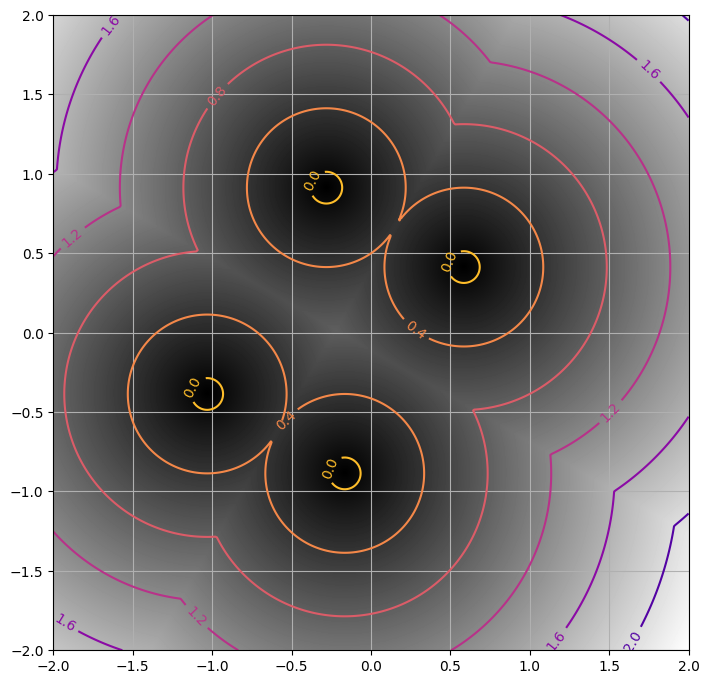

In [15]:
print("Drawing results...")
# Mid-plane cross-section plot
if show_midplane and show=="BINARY":
    fig, ax = plt.subplots(1,1, figsize=(8.25, 8.25))
    ax.imshow(pattern_2d[:, :].T,
              cmap="binary_r",
              extent=(-co_size[0]/2, co_size[0]/2,
                      -co_size[1]/2, co_size[1]/2),
              origin="lower"
              )
    ax.grid()

    fig.tight_layout()
    plt.show()

if show_midplane and show == "FIELD":
    fig, ax = plt.subplots(1, 1, figsize=(8.25, 8.25))
    print(field.shape)
    ax.imshow(field[:, :].T,
              cmap="binary_r",
              extent=(-co_size[0] / 2, co_size[0] / 2,
                      -co_size[1] / 2, co_size[1] / 2),
              origin="lower"
              )
    cs = ax.contour(coor[0].reshape(co_res_new[0], co_res_new[1]),
                    coor[1].reshape(co_res_new[0], co_res_new[1]),
                    field[:, :],
                    cmap="plasma_r")
    ax.clabel(cs, inline=True, fontsize=10)
    ax.grid()